# Module 5 - Modern Portfolio Theory

   ### Welcome to the Answer notebook for Module 5 ! 
Make sure that you've submitted the module 4 notebook and unlocked Module 5 yourself before you start coding here


#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

### Query 5.1 
5.1 For your chosen stock, calculate the mean daily return and daily standard deviation of returns, and then just annualise them to get mean expected annual return and volatility of that single stock. **( annual mean = daily mean * 252 , annual stdev = daily stdev * sqrt(252) )**

In [1]:
import pandas as pd
import numpy as np

stock1 = pd.read_csv('week3.csv')
stock1.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,Year,vwap_num,Day_Perc_Change,Trend,Beta,Sma,Lma,bollinger,upper,lower
0,JUBLFOOD,EQ,2017-05-15,986.35,991.85,1031.00,983.55,1029.60,1025.45,1009.72,...,2017,5.911371e+08,0.000000,Slight or No change,NaN,NaN,NaN,NaN,NaN,NaN
1,JUBLFOOD,EQ,2017-05-16,1025.45,1028.50,1054.85,1028.50,1052.00,1050.65,1042.26,...,2017,5.122024e+08,2.457458,Positive,NaN,NaN,NaN,NaN,NaN,NaN
2,JUBLFOOD,EQ,2017-05-17,1050.65,1044.00,1058.75,1024.20,1047.00,1049.05,1039.93,...,2017,4.130645e+08,-0.152287,Slight or No change,NaN,NaN,NaN,NaN,NaN,NaN
3,JUBLFOOD,EQ,2017-05-18,1049.05,1039.70,1049.15,1012.20,1014.10,1019.35,1033.80,...,2017,3.888127e+08,-2.831133,Negative,NaN,NaN,NaN,NaN,NaN,NaN
4,JUBLFOOD,EQ,2017-05-19,1019.35,1022.00,1042.20,1011.00,1012.55,1018.10,1025.24,...,2017,2.930621e+08,-0.122627,Slight or No change,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
import math

Daily_return_jubl = stock1['Day_Perc_Change'].mean()
Daily_Std_Dev = stock1['Day_Perc_Change'].std()
Annual_return_jubl = Daily_return_jubl*252
Volatility = Daily_Std_Dev*math.sqrt(252)


## Query 5.2

In [3]:
stock2 = pd.read_csv('MINDTREE.csv')
stock2['Day_Perc_Change_mindtree'] = (stock2['Close Price'].pct_change())*100
stock2.iloc[0,-1] = 0
stock3 = pd.read_csv('MARUTI.csv')
stock3['Day_Perc_Change_maruti'] = (stock3['Close Price'].pct_change())*100
stock3.iloc[0,-1] = 0
stock4 = pd.read_csv('RELIANCE.csv')
stock4['Day_Perc_Change_reliance'] = (stock4['Close Price'].pct_change())*100
stock4.iloc[0,-1] = 0
stock5 = pd.read_csv('GMRINFRA.csv')
stock5['Day_Perc_Change_gmrinfra'] = (stock5['Close Price'].pct_change())*100
stock5.iloc[0,-1] = 0


In [4]:
portfolio = pd.DataFrame([stock1['Day_Perc_Change'], stock2['Day_Perc_Change_mindtree'] , 
                          stock3['Day_Perc_Change_maruti'], 
             stock4['Day_Perc_Change_reliance'], stock5['Day_Perc_Change_gmrinfra']]).transpose()

# portfolio = portfolio*252
portfolio.head()

,Day_Perc_Change,Day_Perc_Change_mindtree,Day_Perc_Change_maruti,Day_Perc_Change_reliance,Day_Perc_Change_gmrinfra
0,0.000000,0.000000,0.000000,0.000000,0.000000
1,2.457458,0.363137,1.905802,0.907671,-0.854701
2,-0.152287,-0.968120,0.061116,-0.235936,-0.574713
3,-2.831133,-2.656265,-1.827340,-1.903037,-3.179191
4,-0.122627,0.933252,-0.592881,-0.640374,1.194030


In [5]:
# Daily_return_mindtree = stock2['Day_Perc_Change_mindtree'].mean()
# Annual_return_mindtree = Daily_return_mindtree*252

# Daily_return_maruti = stock3['Day_Perc_Change_maruti'].mean()
# Annual_return_maruti = Daily_return_maruti*252

# Daily_return_reliance = stock4['Day_Perc_Change_reliance'].mean()
# Annual_return_reliance = Daily_return_reliance*252

# Daily_return_gmrinfra = stock5['Day_Perc_Change_gmrinfra'].mean()
# Annual_return_gmrinfra = Daily_return_gmrinfra*252

# Annual_returns = pd.DataFrame([Annual_return_jubl, Annual_return_mindtree, Annual_return_maruti, 
#                   Annual_return_reliance, Annual_return_gmrinfra])
# Annual_returns

In [6]:
corr_matrix = portfolio.corr()
corr_matrix

,Day_Perc_Change,Day_Perc_Change_mindtree,Day_Perc_Change_maruti,Day_Perc_Change_reliance,Day_Perc_Change_gmrinfra
Day_Perc_Change,1.000000,0.091540,0.085803,0.054703,0.140271
Day_Perc_Change_mindtree,0.091540,1.000000,0.115436,0.072101,0.166017
Day_Perc_Change_maruti,0.085803,0.115436,1.000000,0.068512,0.131865
Day_Perc_Change_reliance,0.054703,0.072101,0.068512,1.000000,0.090795
Day_Perc_Change_gmrinfra,0.140271,0.166017,0.131865,0.090795,1.000000


In [7]:
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

### Annual Portfolio Return

In [8]:
mean_daily_returns = portfolio.mean()
portfolio_return = np.sum(mean_daily_returns * weights) * 252
portfolio_return

15.68886583653755

### Portfolio volatility

In [9]:
portfolio_volatility = np.sqrt(np.dot(weights.T,np.dot(corr_matrix, weights))) * np.sqrt(252)
portfolio_volatility # Portfolio_stdandard_deviation

8.420426536384353

## Query 5.3

In [10]:
num_portfolios = 25000

results = np.zeros((3,num_portfolios))

for i in range(num_portfolios):

    weights = np.random.random(5)
    weights /= np.sum(weights)
    
    #calculate portfolio return and volatility
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(corr_matrix, weights))) * np.sqrt(252)
    
    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    #store Sharpe Ratio (return / volatility) 
    results[2,i] = results[0,i] / results[1,i]
#convert results array to Pandas DataFrame
results_frame = pd.DataFrame(results.T,columns=['returns','volatility','sharpe'])



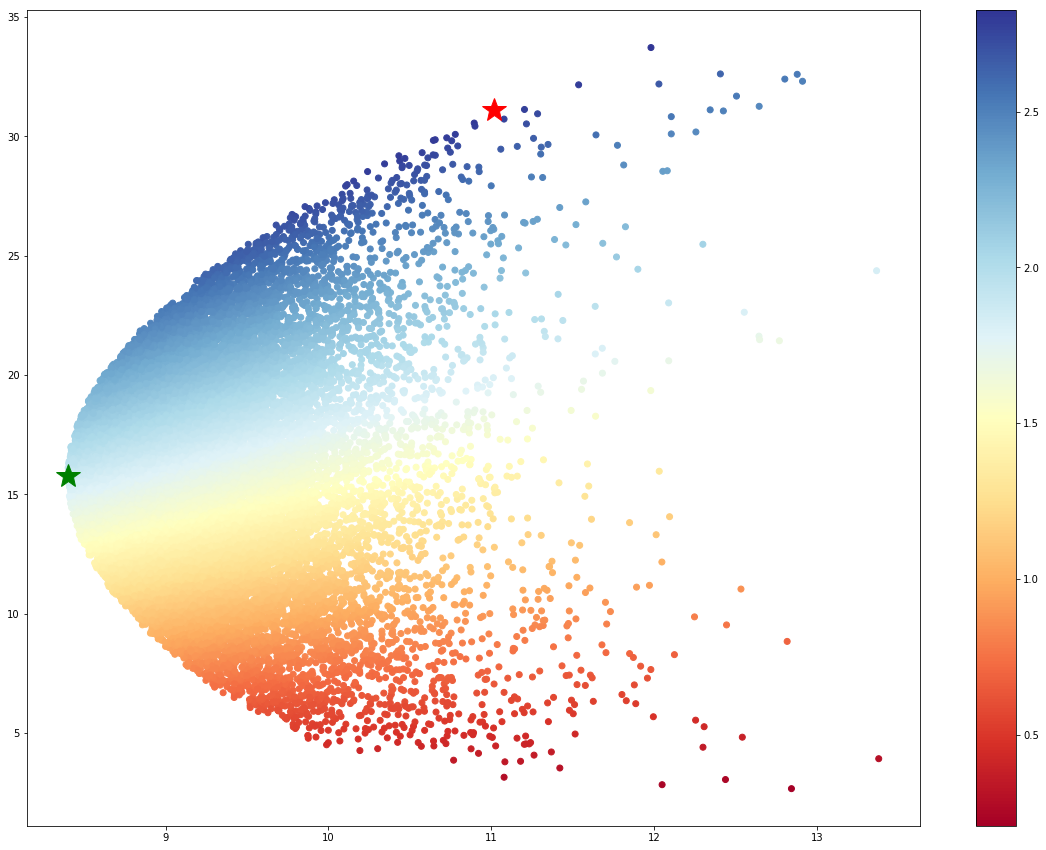

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,15))
plt.scatter(x=results_frame.volatility, y=results_frame.returns, c=results_frame.sharpe,cmap='RdYlBu')

max_sharpe = results_frame.iloc[results_frame['sharpe'].idxmax()]

min_volatility = results_frame.iloc[results_frame['volatility'].idxmin()]

plt.plot(max_sharpe[1], max_sharpe[0], marker='*', markerfacecolor='red',markersize=25, markeredgecolor='red')
plt.plot(min_volatility[1], min_volatility[0], marker='*', markerfacecolor='green',markersize=25, markeredgecolor='green')
plt.colorbar()
